In [1]:
using Intan, MAT, PyPlot

In [15]:
path_to_data="/media/wanglab/Data/Recordings/Wenxi/04_20/04_20_6_541662/" #Change to folder where your directory is located

myv=Intan.parse_v(string(path_to_data,"v.bin"))

file = matopen(string(path_to_data,"v.mat"), "w")
write(file, "voltage", myv)
close(file)

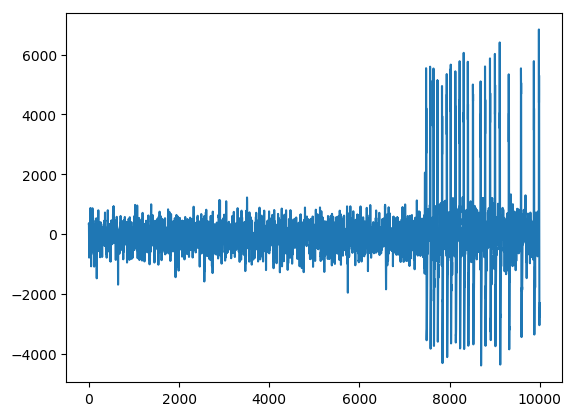

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9f4fcbef28>

In [16]:
plot(myv[170000:180000])

In [17]:
data_path=path_to_data
ttl_name="ttl.bin"
file_name="output.mp4"

function get_events(event_array)

    out_array=zeros(Int64,0)

    push!(out_array,event_array[1])

    for i=2:length(event_array)
        if (event_array[i]-event_array[i-1]>1)
            push!(out_array,event_array[i])
        end
    end
    out_array
end

ttls=Intan.parse_ttl(string(data_path,ttl_name),[true,false,true])[1:3]

cam=get_events(ttls[2])./30000

yy=read(`mediainfo --Output="Video;%FrameCount%" $(string(data_path,file_name))`)
frame_count=parse(Int64,convert(String,yy[1:(end-1)]))

error_flag=false

frame_shift=0

if (length(cam)-frame_count) !=0
    println("Error: Frames don't match")
    error_flag=true
    
    if length(cam)>frame_count
        println(string("You are missing ",length(cam)-frame_count," frames from the video file"))
        frame_shift = length(cam) - frame_count
        
    else
        println(string("You are missing ",frame_count - length(cam), " ttls to match with the video"))
        frame_shift = frame_count - length(cam)
    end
end

time_mat=zeros(Float64,length(cam)-frame_shift,6)

for i=(frame_shift+1):length(cam)
    fs=frame_shift
    time_mat[i-fs,1]=i - fs#Frame number
    time_mat[i-fs,2]=cam[i]
    time_mat[i-fs,3]=time_mat[i-fs,1]/25
    time_mat[i-fs,4]=div(time_mat[i-fs,3],3600) #Time in hours
    time_mat[i-fs,5]=div(time_mat[i-fs,3]-time_mat[i-fs,4]*3600,60) #Time in seconds
    time_mat[i-fs,6]=time_mat[i-fs,3]-time_mat[i-fs,4]*3600-time_mat[i-fs,5]*60 #Time in hours
end


file=matopen(string(data_path,"times.mat"),"w")
    write(file,"times",time_mat)
close(file)

Error: Frames don't match
You are missing 67 frames from the video file


In [12]:
time_mat

710259×6 Array{Float64,2}:
      1.0     0.0747      0.04  0.0   0.0   0.04
      2.0     0.0767      0.08  0.0   0.0   0.08
      3.0     0.0787      0.12  0.0   0.0   0.12
      4.0     0.0807      0.16  0.0   0.0   0.16
      5.0     0.0827      0.2   0.0   0.0   0.2 
      6.0     0.0847      0.24  0.0   0.0   0.24
      7.0     0.0867      0.28  0.0   0.0   0.28
      8.0     0.0887      0.32  0.0   0.0   0.32
      9.0     0.0907      0.36  0.0   0.0   0.36
     10.0     0.0927      0.4   0.0   0.0   0.4 
     11.0     0.0947      0.44  0.0   0.0   0.44
     12.0     0.0967      0.48  0.0   0.0   0.48
     13.0     0.0987      0.52  0.0   0.0   0.52
      ⋮                                     ⋮   
 710248.0  1420.62    28409.9   7.0  53.0  29.92
 710249.0  1420.62    28410.0   7.0  53.0  29.96
 710250.0  1420.62    28410.0   7.0  53.0  30.0 
 710251.0  1420.62    28410.0   7.0  53.0  30.04
 710252.0  1420.62    28410.1   7.0  53.0  30.08
 710253.0  1420.63    28410.1   7.0  53.0 